## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using the same data as for the previous homeworks. Use the version you created called df2 where you already cleaned, dropped some of the variables but did not create dummy variables. Instead of creating dummy variables, you have to recode this column as suggested bellow.
Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a pdf file of your work.
Good luck!



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

1. Let's take the example of customer reviews. **Analyzing the sentiment expressed in reviews** can be a valuable task for businesses looking to understand customer feedback. 
In this scenario, classification involves categorizing the sentiments expressed in reviews as **"Positive," "Negative," and "Neutral"**. This classification helps businesses gauge customer satisfaction, identify areas for improvement, and respond quickly to any negative feedback.

2. Another example is the problem of loan approval in the banking industry. When individuals or businesses apply for loans, banks need to assess the **credit worthiness of applicant**s to determine whether to **approve or deny the loan**. *This is a classic classification problem*.

In this context, the classification task involves categorizing loan applications into **two classes:"Approved" and "Denied".** The decision is typically based on various factors such as credit score, income, employment history, etc.

# 2. Preprocessing

In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imports1.csv' from our previous homeworks. More specifically, use the version you created called df2 where you already cleaned, dropped some of the variables but DID NOT CREATE dummy variables. Follow the prompts to complete the homework.**

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#importing df2 from previous homework
df = pd.read_csv('df2.csv')

In [23]:
df = df.drop(['Unnamed: 0'],axis=1)

In [24]:
df

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
191,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
192,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
193,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [25]:
# replacing gas with 0 and diesel with 1 in fuel_type column.
df['fuel_type'].replace('gas', 0 , inplace=True)
df['fuel_type'].replace('diesel', 1 , inplace=True)

In [26]:
df

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
191,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
192,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
193,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [27]:
df.columns

Index(['fuel_type', 'wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [28]:
# defining X and y components.
y = df[['fuel_type']] 
X = df[['wheel_base', 'length', 'width', 'heights', 'curb_weight','engine_size', 'bore', 
    'stroke', 'comprassion', 'horse_power','peak_rpm', 'city_mpg', 'highway_mpg', 'price']]


In [29]:
print(y.shape)
X.shape

(195, 1)


(195, 14)

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [54]:
#splitting data in training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746) #test size = 30% of the whole dataset

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

AUC-ROC Score: 1.0000
Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0  9]]


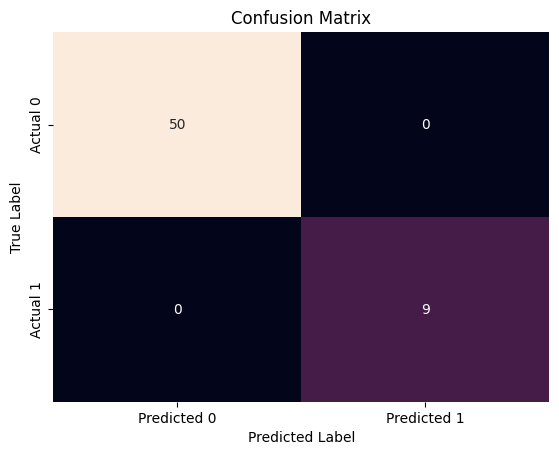

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [55]:
# Creating a Logistic Regression model
model = LogisticRegression(max_iter=200) # initiating the model

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of only positive class

auc_roc = roc_auc_score(y_test, y_pred_proba) # Area under curver ROC score

# Display the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc:.4f}")
# printing evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d",  cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(classification_rep)

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

model = GaussianNB() # initiating the model

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

auc_roc = roc_auc_score(y_test, y_pred_proba) # Area under curver ROC score

# Display the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc:.4f}")
# printing evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_rep)

AUC-ROC Score: 1.0000
Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

AUC-ROC Score: 0.7256
Accuracy: 0.88
Confusion Matrix:
[[49  1]
 [ 6  3]]


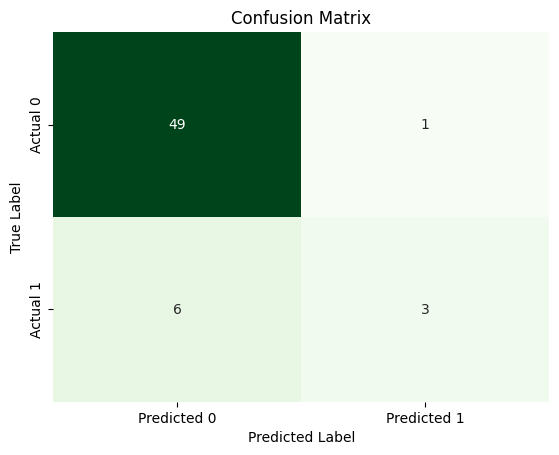

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        50
           1       0.75      0.33      0.46         9

    accuracy                           0.88        59
   macro avg       0.82      0.66      0.70        59
weighted avg       0.87      0.88      0.86        59



In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

model = KNeighborsClassifier(n_neighbors=3)

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

auc_roc = roc_auc_score(y_test, y_pred_proba)

# Display the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc:.4f}")
# printing evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(classification_rep)

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

# model = SVC(kernel='linear') 

# # Training the model on the training set
# model.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = model.predict(X_test)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Calculate AUC-ROC
# y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# auc_roc = roc_auc_score(y_test, y_pred_proba)

# # Display the AUC-ROC score
# print(f"AUC-ROC Score: {auc_roc:.4f}")
# # printing evaluation metrics
# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)

### Using Random Forest

AUC-ROC Score: 1.0000
Accuracy: 0.98
Confusion Matrix:
[[50  0]
 [ 1  8]]


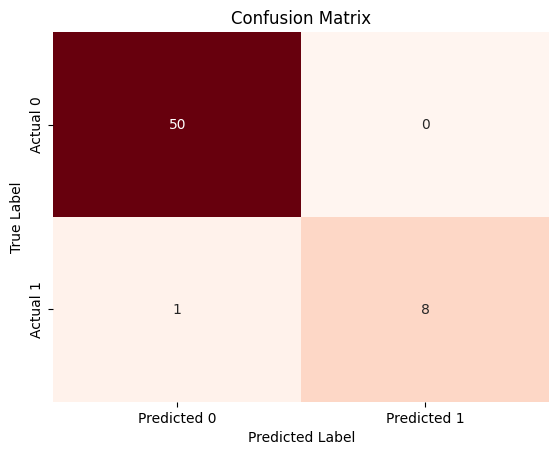

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.89      0.94         9

    accuracy                           0.98        59
   macro avg       0.99      0.94      0.97        59
weighted avg       0.98      0.98      0.98        59



In [47]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

model = RandomForestClassifier(n_estimators=100, random_state=42) 

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

auc_roc = roc_auc_score(y_test, y_pred_proba)

# Display the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc:.4f}")
# printing evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(classification_rep)

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

1. The **Logistic regression** and **Naive Bayes** model performed **idealistically** with Accuracy, precison , recall,f1 score and AUC-ROC score equal to **1**. But, this might be a case of **overfitting** where the model has predicted all test samples with 100% accuracy.
   Even in the confusion matrix, the **false positive and false negatives values were not predicted at all**, implying the model did not get confused 
   during prediction.
2. For **KNN**, the optimal **neighbor count** was found to be **3** which resulted in a model accuracy of 88%. The AUC-ROC score was found to be 72.56%. The **precision has fallen more** for class 1 compared to class 0 because, as shown in the confusion matrix the model predicted **6 false positives and 1 false negative**. Furthurmore, when we look at the support column of the classificatiion report, we can see the **metrics for class 0 and 1 have different amount of data points**. Class 1 has 50, where as class 0 has only 9. This is why the scores for class 0 is better than class 1. There is a class imbalance.
The macro and weighted average values for the two classes are different because these classes are imbalanced.
[ This is why we cannot consider only the accuracy of the models as a performance metric, since it provides biased scores due to class imbalance. hence, we should not consider the Logistic regression and Naive bayes model for prediction] 
3. For the next model we use **RandomForest classifier**. In this case, the **Accuracy is 98%** and AUC-ROC score is 1. From confusion matrix, we see that it **classified only 1 observation as a false positive and 0 false negatives**. In this case, the precision, recall, f1 score, macro and weighted average of the two classes **are very similar and not much difference** bewtween them even though the dataset has class imbalance.

The main problem for overfitting in the models is due to imbalance of the classes. There is lot data labelled as gas than diesel.
### Out of these, Random Forest classifier performs best !

There is too much difference between the f1-scores of the two classes of the first 3 models. **This means that the class with higher f1 score will be predicted with greater accuracy on new data than the other class.**

## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

In [36]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE # importing SMOTE(Synthetic Minority Oversampling Technique)
from collections import Counter
smote = SMOTE()
# os= RandomOverSampler()

In [37]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [38]:
y_train.value_counts()

fuel_type
0            125
1             11
Name: count, dtype: int64

In [58]:
y_train_smote.value_counts() #checking if oversampling has occured

fuel_type
0            125
1            125
Name: count, dtype: int64

AUC-ROC Score: 0.8467
Accuracy: 0.83
Confusion Matrix:
[[41  9]
 [ 1  8]]


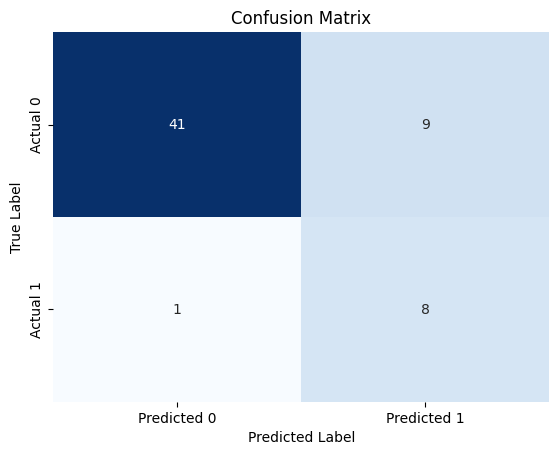

              precision    recall  f1-score   support

           0       0.98      0.82      0.89        50
           1       0.47      0.89      0.62         9

    accuracy                           0.83        59
   macro avg       0.72      0.85      0.75        59
weighted avg       0.90      0.83      0.85        59



In [53]:
model = KNeighborsClassifier(n_neighbors=3)

# Training the model on the training set
model.fit(X_train_smote, y_train_smote)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class

auc_roc = roc_auc_score(y_test, y_pred_proba)

# Display the AUC-ROC score
print(f"AUC-ROC Score: {auc_roc:.4f}")
# printing evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print(classification_rep)

By comparison of the KNN classifier model before Oversampling, after the train dataset was balanced the **recall score for class 1 has increased from 33% to 89%** and **f1-score increased from 46% to 62%**. Also, the **difference in scores between the two classes have decreased** which is a good sign. Unfortunately, the overall **accuracy has decreased from 88% to 83%**, but the **increase in other metrics is also a positive outcome** in performance. There was a similar decrease in precision score.

Also, the confusion matrix shows that the false negatives,False positives and true negatives have increased.

### This model can be improved by tuning the hyperparameters that can result in a better model.